<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module1_Lab1_AIML-/blob/main/Module_1_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracting features from data**
Module 1,Lab 1

In [2]:
! pip install wikipedia
import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=9bcfa4392e42e5defb8b292340a7d2b1c40e0e596d52e3650b0fe19b63a8d27f
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


**Part 1 :Features of text**

In [3]:

topic1='cooking'
topic2='cooling'
wikipedia.set_lang('en')

en1=wikipedia.page(topic1).content
en2=wikipedia.page(topic2).content

wikipedia.set_lang('es')
sp1=wikipedia.page(topic1).content
sp2=wikipedia.page(topic2).content

In [ ]:
sp1

'Una demostración culinaria,[1]\u200b show cooking o showcooking (en inglés cooking show) es una modalidad de cocina que consiste en la preparación de platos frente a los comensales. Originariamente el término surgió con la preparación de recetas en un plató de televisión con una intención meramente lúdica. El programa de cocina de Karlos Arguiñano o MasterChef son dos ejemplos de esta actividad en España. El concepto acoge más escenarios, realizándose en restaurantes y eventos particulares.\n\n\n== Orígenes ==\nEl bufé como técnica de presentación alimenticia ha influido en la creación de platos de cara al público.\nLos programas televisivos introdujeron por primera vez el término, mostrando paso a paso y enfrente de una cámara, cómo preparar platos y recetas. Los concursos de cocina y las clases de cocina en vivo pueden considerarse dentro de esta categoría.\n\n\n== Antecedentes ==\n\nEl sistema ha evolucionado de varias formas, partiendo de los canales de televisión dedicados a la c

In [4]:
def cleanup(text):
  text=text.upper()
  text=re.sub('[^A-Z]+', '',text)
  return text

eng1=cleanup(en1)
eng2=cleanup(en2)
spa1=cleanup(sp1)
spa2=cleanup(sp2)
print(eng1)
print(spa1)

COOLINGISREMOVALOFHEATUSUALLYRESULTINGINALOWERTEMPERATUREANDORPHASECHANGETEMPERATURELOWERINGACHIEVEDBYANYOTHERMEANSMAYALSOBECALLEDCOOLINGTHETRANSFEROFTHERMALENERGYMAYOCCURVIATHERMALRADIATIONHEATCONDUCTIONORCONVECTIONEXAMPLESCANBEASSIMPLEASREDUCINGTEMPERATUREOFACOFFEEDEVICESCOOLANTCOOLINGTOWERSASUSEDINLARGEINDUSTRIALPLANTSANDPOWERSTATIONSDAYTIMEPASSIVERADIATIVECOOLEREVAPORATIVECOOLERHEATEXCHANGERHEATPIPEHEATSINKHVACHEATINGVENTILATIONANDAIRCONDITIONINGINTERCOOLERRADIATIVECOOLINGINHEATSHIELDSRADIATORSINAUTOMOBILESPUMPABLEICETECHNOLOGYTHERMOELECTRICCOOLINGVORTEXTUBEASUSEDININDUSTRIALSPOTCOOLINGREFERENCESEXTERNALLINKSMEDIARELATEDTOCOOLINGATWIKIMEDIACOMMONS
UNADEMOSTRACINCULINARIASHOWCOOKINGOSHOWCOOKINGENINGLSCOOKINGSHOWESUNAMODALIDADDECOCINAQUECONSISTEENLAPREPARACINDEPLATOSFRENTEALOSCOMENSALESORIGINARIAMENTEELTRMINOSURGICONLAPREPARACINDERECETASENUNPLATDETELEVISINCONUNAINTENCINMERAMENTELDICAELPROGRAMADECOCINADEKARLOSARGUIANOOMASTERCHEFSONDOSEJEMPLOSDEESTAACTIVIDADENESPAAELCONCEPTOACOGEMSESCE

In [5]:
def tuple2string(tup):
  st=''
  for i in tup:
    st+=i+' '
  return st
def key2string(keys):
  return [tuple2string(j) for j in keys]

def plothistogram(ngram):
  keys=key2string(ngram.keys())
  values=list(ngram.values())
  combined=zip(keys,values)
  zipped_sorted=sorted(combined,key=lambda x: x[0])
  keys,values=map(list,zip(*zipped_sorted))
  plt.bar(keys,values)


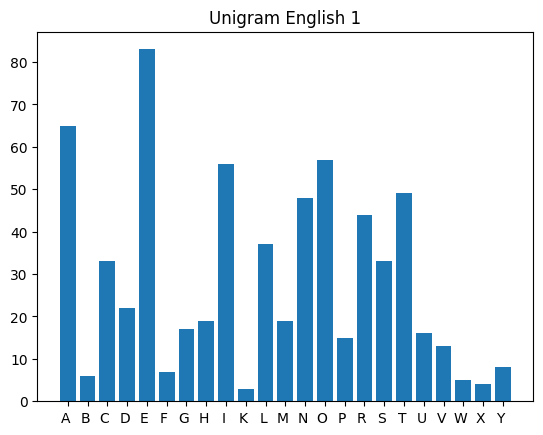

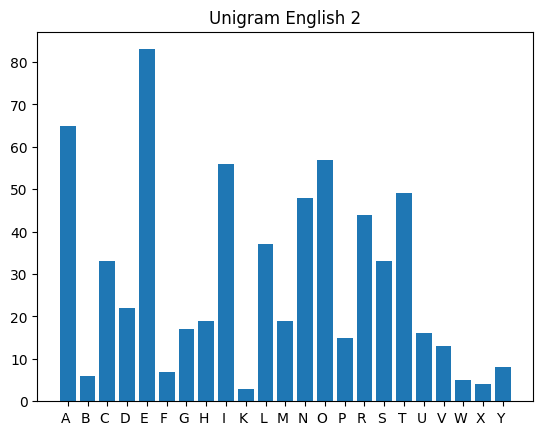

In [6]:
unigram_eng1=Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('Unigram English 1')
plt.show()
unigram_eng2=Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('Unigram English 2')
plt.show()

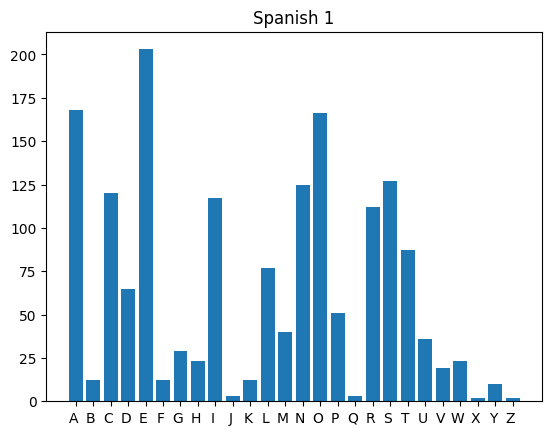

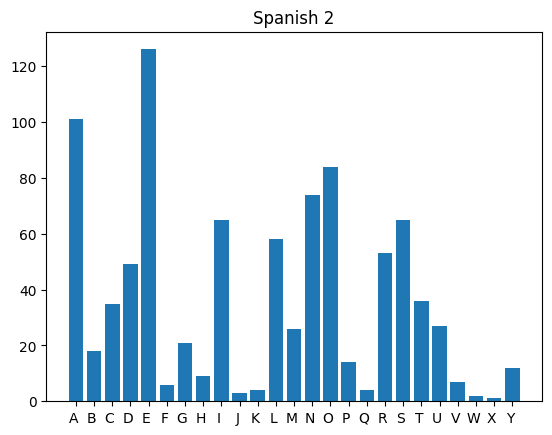

In [7]:
unigram_es1=Counter(ngrams(spa1,1))
plothistogram(unigram_es1)
plt.title('Spanish 1')
plt.show()
unigram_es2=Counter(ngrams(spa2,1))
plothistogram(unigram_es2)
plt.title('Spanish 2')
plt.show()

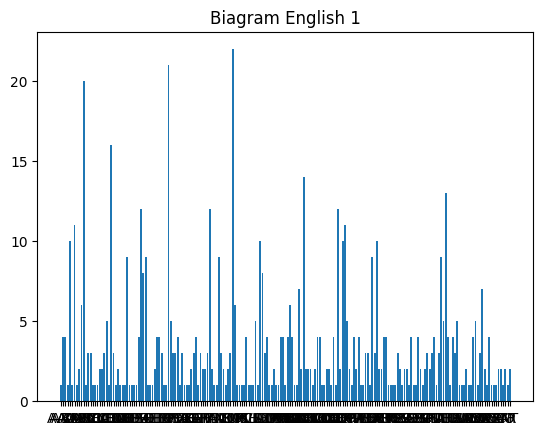

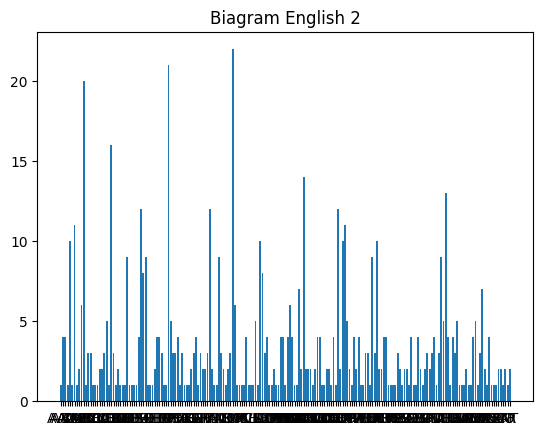

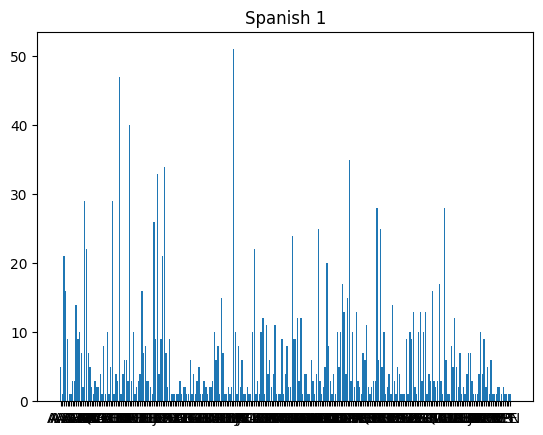

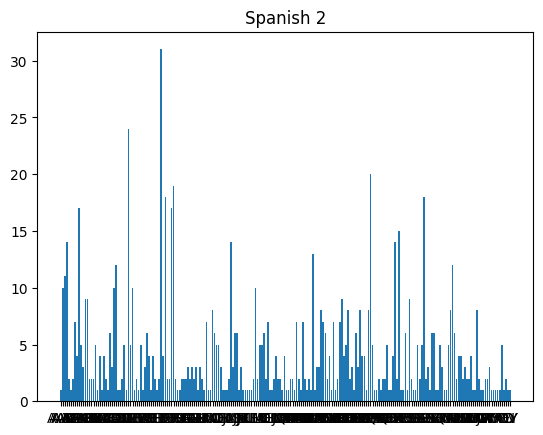

In [8]:
bigram_eng1=Counter(ngrams(eng1,2))
plothistogram(bigram_eng1)
plt.title('Biagram English 1')
plt.show()
bigram_eng2=Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('Biagram English 2')
plt.show()

biagram_es1=Counter(ngrams(spa1,2))
plothistogram(biagram_es1)
plt.title('Spanish 1')
plt.show()
biagram_es2=Counter(ngrams(spa2,2))
plothistogram(biagram_es2)
plt.title('Spanish 2')
plt.show()

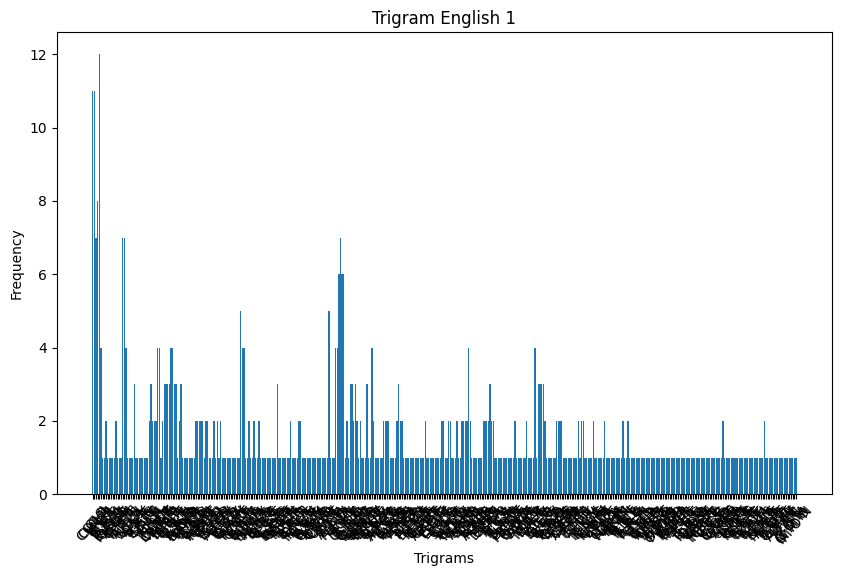

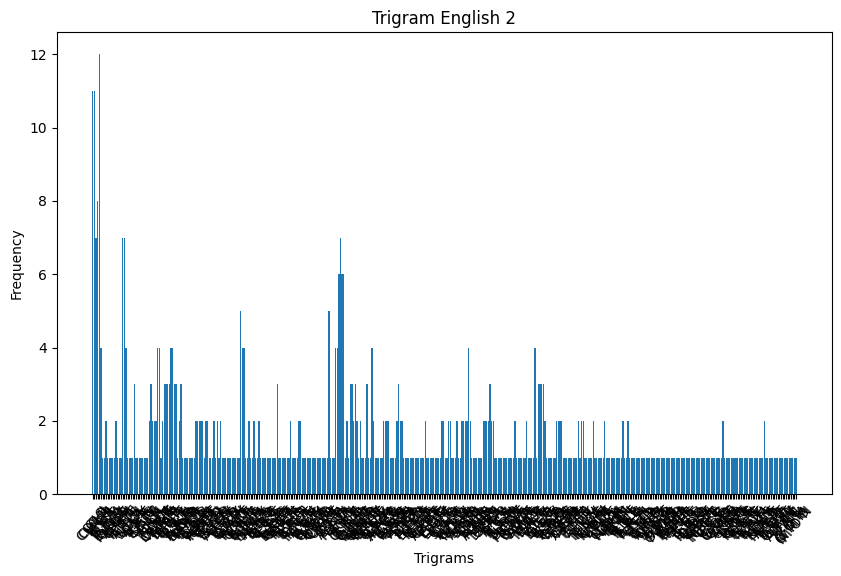

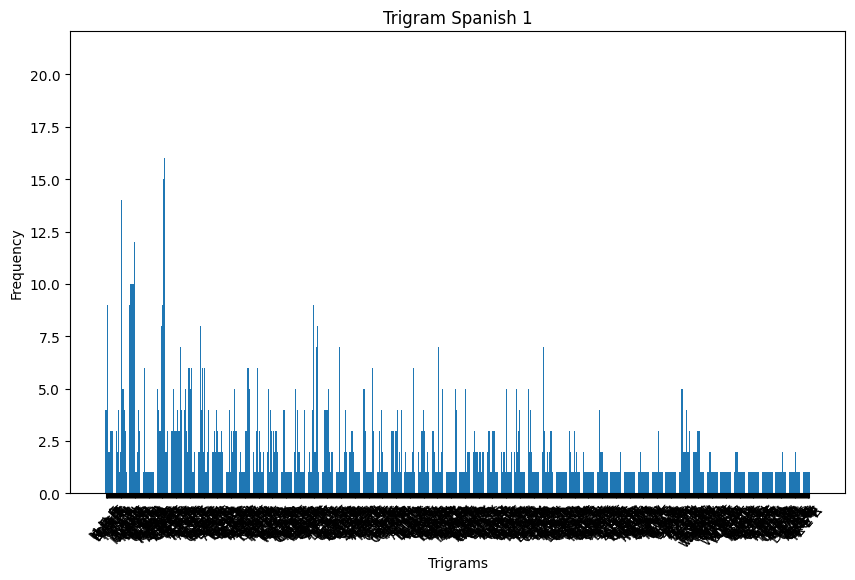

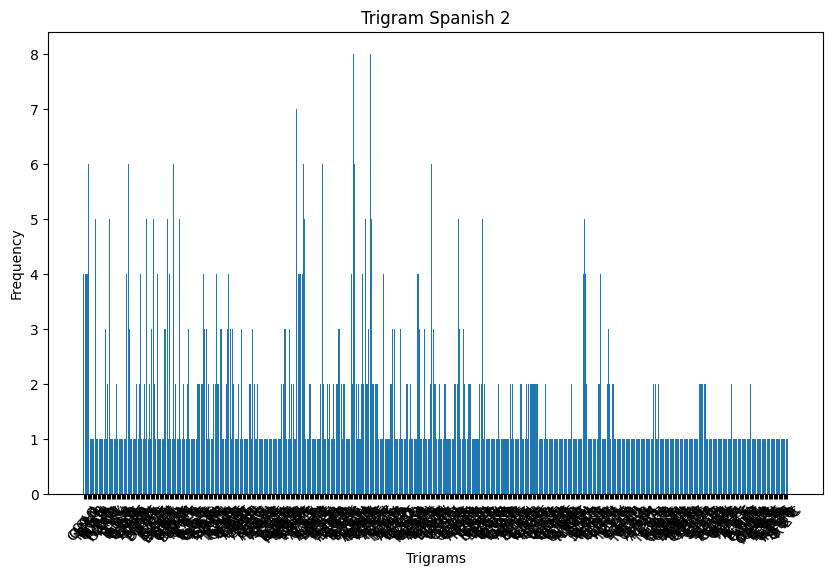

In [18]:
def plot_histogram(data, title):
    plt.figure(figsize=(10,6))
    plt.bar([' '.join(gram) for gram in data.keys()], data.values())
    plt.title(title)
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=50)
    plt.show()
trigram_eng1 = Counter(ngrams(eng1, 3))
plot_histogram(trigram_eng1, 'Trigram English 1')
trigram_eng2 = Counter(ngrams(eng2, 3))
plot_histogram(trigram_eng2, 'Trigram English 2')
trigram_spa1 = Counter(ngrams(spa1, 3))
plot_histogram(trigram_spa1, 'Trigram Spanish 1')
trigram_spa2 = Counter(ngrams(spa2, 3))
plot_histogram(trigram_spa2, 'Trigram Spanish 2')


In [ ]:
def plotbihistogram(ngram):
  frequency=np.zeros((35,35))
  for i in range(35):
    for j in range(35):
      frequency[i][j]=ngram[(chr(i+65),chr(j+65))]
  plt.imshow(frequency,cmap='hot')
  return frequency

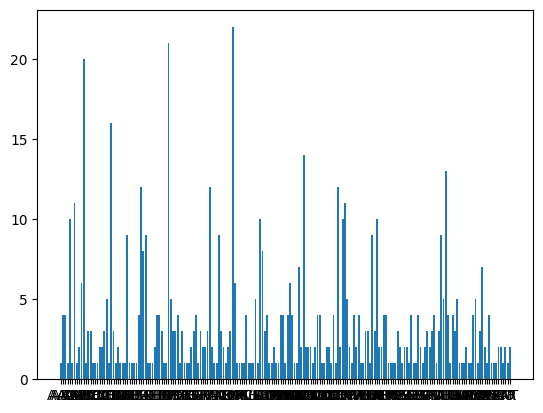

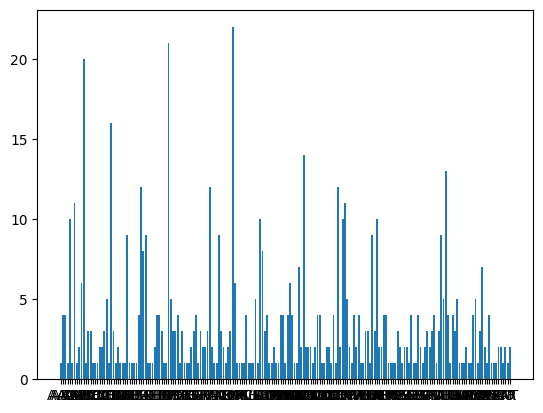

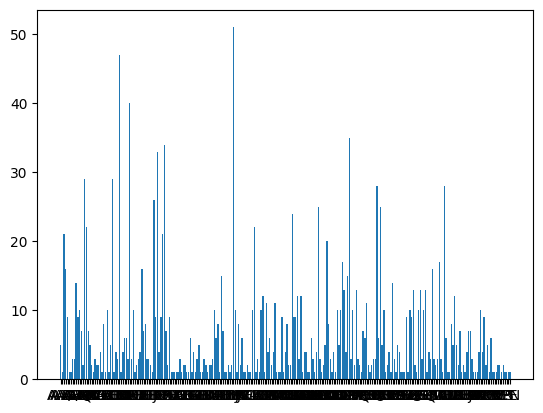

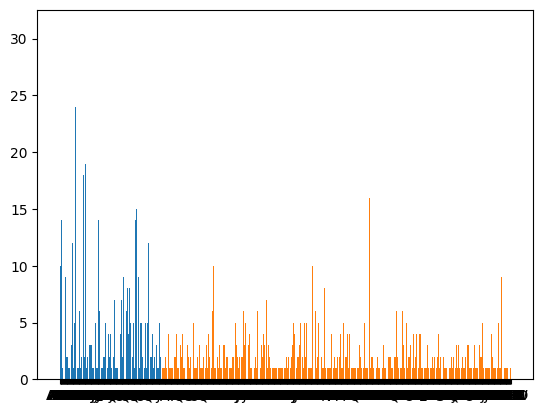

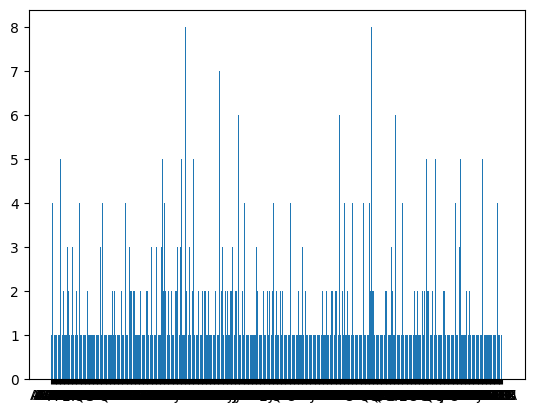

In [24]:
bieng1=plothistogram(bigram_eng1)
plt.show()
bieng2=plothistogram(bigram_eng2)
plt.show()
bises1=plothistogram(biagram_es1)
plt.show()
bises2=plothistogram(biagram_es2)

tries1=plothistogram(trigram_spa1)
plt.show()
tries2=plothistogram(trigram_spa2)


In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind=int(ind)
  i=int(ind/35)
  j=int(ind%35)
  return (chr(ord('a')+i),chr(ord('a')+j))

def showTopN(bifrequency,n=15):
  f=bifrequency.flatten()
  arg=np.argsort(-f)
  for i in range(n):
    print(f'{ind2tup(arg[i])}:{f[arg[i]]}')

In [ ]:
print('\nEnglish 1 :')
showTopN(bieng1)
print('\nEnglish 2 :')
showTopN(bieng2)
print('\nSpanish 1 :')
showTopN(bises1)
print('\nSpanish 2 :')
showTopN(bises2)



English 1 :
('i', 'n'):22.0
('e', 'r'):21.0
('a', 't'):20.0
('c', 'o'):16.0
('n', 'g'):14.0
('t', 'i'):13.0
('h', 'e'):12.0
('o', 'l'):12.0
('e', 'a'):12.0
('o', 'o'):11.0
('a', 'n'):11.0
('r', 'e'):10.0
('l', 'e'):10.0
('a', 'l'):10.0
('o', 'n'):10.0

English 2 :
('i', 'n'):22.0
('e', 'r'):21.0
('a', 't'):20.0
('c', 'o'):16.0
('n', 'g'):14.0
('t', 'i'):13.0
('h', 'e'):12.0
('o', 'l'):12.0
('e', 'a'):12.0
('o', 'o'):11.0
('a', 'n'):11.0
('r', 'e'):10.0
('l', 'e'):10.0
('a', 'l'):10.0
('o', 'n'):10.0

Spanish 1 :
('i', 'n'):51.0
('c', 'o'):47.0
('d', 'e'):40.0
('o', 's'):35.0
('e', 's'):34.0
('e', 'n'):33.0
('c', 'i'):29.0
('a', 'r'):29.0
('r', 'a'):28.0
('t', 'e'):28.0
('e', 'l'):26.0
('r', 'e'):25.0
('n', 't'):25.0
('n', 'a'):24.0
('a', 's'):22.0

Spanish 2 :
('e', 'l'):31.0
('d', 'e'):24.0
('o', 's'):20.0
('e', 's'):19.0
('s', 'e'):18.0
('e', 'n'):18.0
('e', 'r'):17.0
('a', 'n'):17.0
('r', 'e'):15.0
('a', 'd'):14.0
('r', 'a'):14.0
('i', 'n'):14.0
('n', 'a'):13.0
('c', 'o'):12.0
('t'

# **Part 2 : Written Numbers**

In [31]:
from keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
no1=train_X[train_Y==4,:,:]
no0=train_X[train_Y==9,:,:]

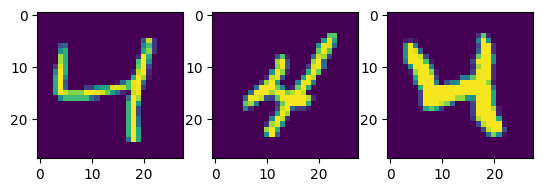

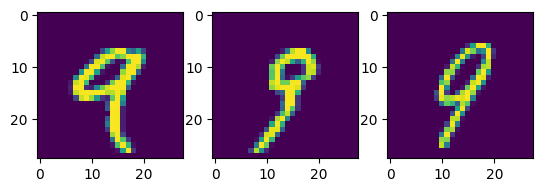

In [33]:
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(no1[i,:,:])
plt.show()
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(no0[i,:,:])
plt.show()

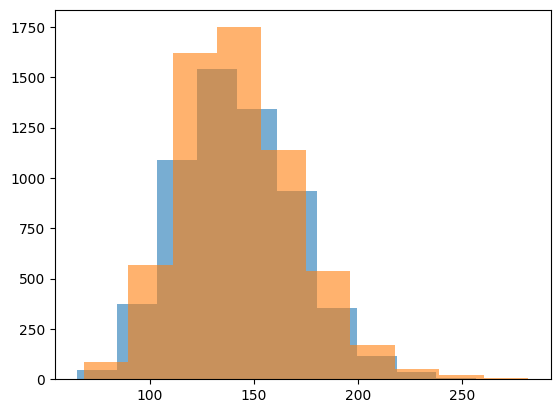

In [34]:
sum1=np.sum(no1>0,(1,2))
sum0=np.sum(no0>0,(1,2))
plt.hist(sum1,alpha=0.6);
plt.hist(sum0,alpha=0.6);

In [30]:
def cumArray(img):
  img2=img.copy()
  for i in range(1,img2.shape[1]):
    img2[i,:]=img2[i,:]+img2[i-1,:]
    img2=img>0
  return img2

def getHolePixels(img):
  im1=cumArray(img)
  im2=np.rot90(cumArray(np.rot90(img)),5)
  im3=np.rot90(cumArray(np.rot90(img,2)),4)
  im4=np.rot90(cumArray(np.rot90(img,3)),3)
  hull=im1&im2&im3&im4
  hole=hull&~(img>0)
  return hole

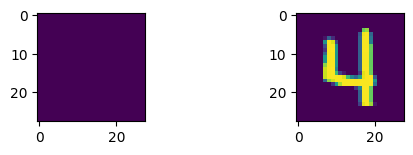

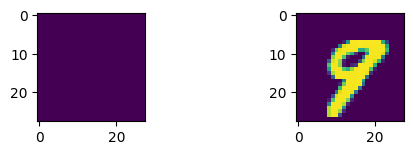

In [35]:
imgs=[no1[509,:,:],no0[509,:,:]]
for i in imgs:
  plt.subplot(2,4,2)
  plt.imshow(getHolePixels(i))
  plt.subplot(2,4,4)
  plt.imshow(i)
  plt.show()

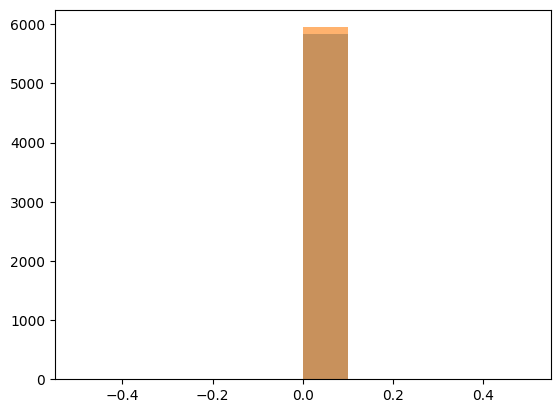

In [36]:
hole1=np.array([getHolePixels(i).sum() for i in no1])
hole0=np.array([getHolePixels(i).sum() for i in no0])
plt.hist(hole1,alpha=0.6);
plt.hist(hole0,alpha=0.6);

In [29]:
def getHullPixels(img):
  im1=cumArray(img)
  im2=np.rot90(cumArray(np.rot90(img)),3)
  im3=np.rot90(cumArray(np.rot90(img,2)),2)
  im4=np.rot90(cumArray(np.rot90(img,3)),1)
  hull=im1&im2&im3&im4
  return hull

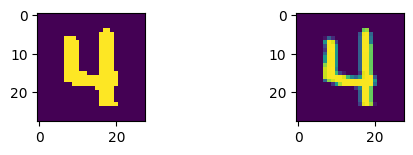

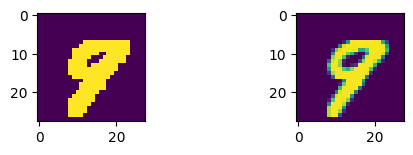

In [37]:
imgs=[no1[509,:,:],no0[509,:,:]]
for i in imgs:
  plt.subplot(2,4,2)
  plt.imshow(getHullPixels(i))
  plt.subplot(2,4,4)
  plt.imshow(i)
  plt.show()

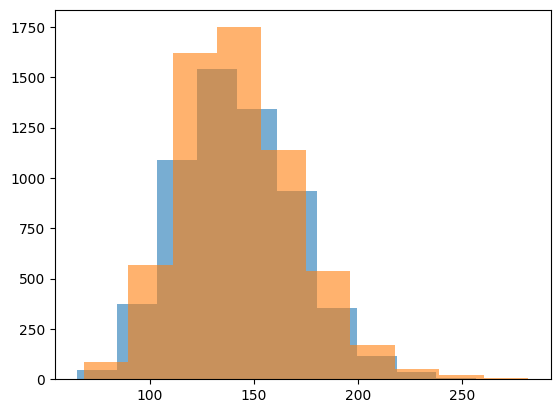

In [38]:
hull1=np.array([getHullPixels(i).sum() for i in no1])
hull0=np.array([getHullPixels(i).sum() for i in no0])
plt.hist(hull1,alpha=0.6);
plt.hist(hull0,alpha=0.6);

In [28]:
def minus(a, b):
  return a & ~ b
def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

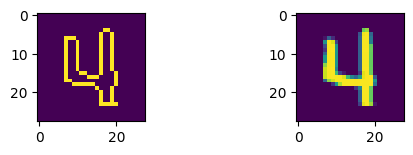

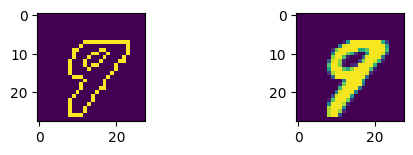

In [39]:
imgs=[no1[509,:,:],no0[509,:,:]]
for i in imgs:
  plt.subplot(2,4,2)
  plt.imshow(getBoundaryPixels(i))
  plt.subplot(2,4,4)
  plt.imshow(i)
  plt.show()

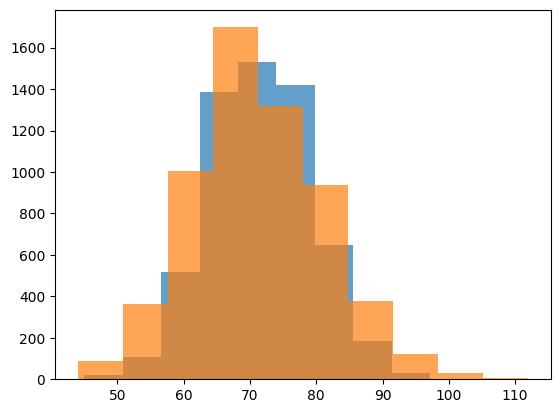

In [40]:
bound1=np.array([getBoundaryPixels(i).sum() for i in no1])
bound0=np.array([getBoundaryPixels(i).sum() for i in no0])
plt.hist(bound1,alpha=0.7);
plt.hist(bound0,alpha=0.7);

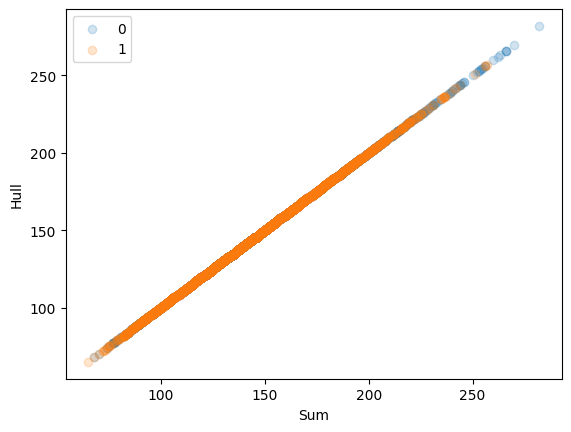

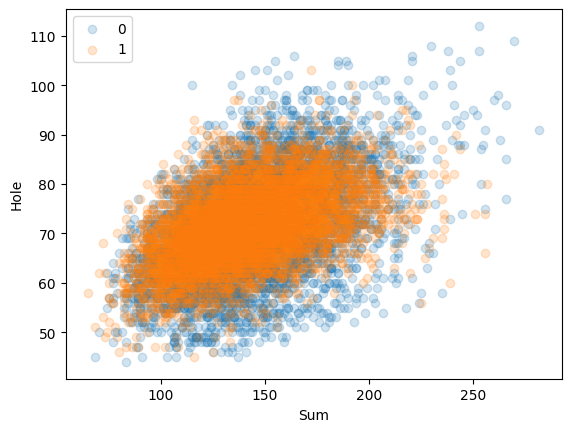

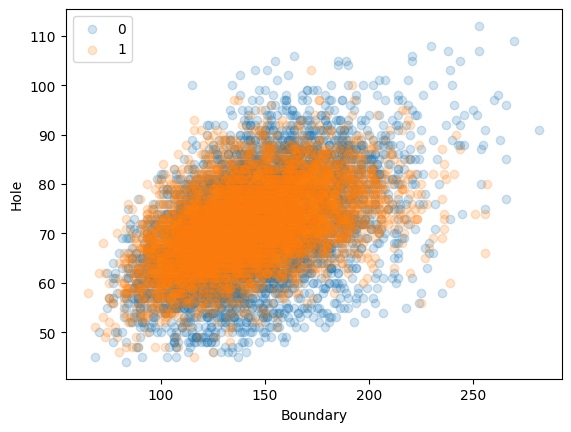

In [43]:
plt.scatter(sum0,hull0,alpha=0.2)
plt.scatter(sum1,hull1,alpha=0.2)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1','2','3'])
plt.show()

plt.scatter(sum0,bound0,alpha=0.2)
plt.scatter(sum1,bound1,alpha=0.2)
plt.xlabel('Sum')
plt.ylabel('Hole')
plt.legend(['0','1','2','3'])
plt.show()

plt.scatter(hull0,bound0,alpha=0.2)
plt.scatter(hull1,bound1,alpha=0.2)
plt.xlabel('Boundary')
plt.ylabel('Hole')
plt.legend(['0','1','2','3'])

In [46]:
class4=['Class 4']*len(sum1)
class9=['Class 9']*len(sum0)
df=pd.DataFrame(list(zip(np.concatenate((hole0,hole0)),np.concatenate((sum1,sum0)),
                         np.concatenate((hull0,hull0)),np.concatenate((bound0,bound0)),
                         np.concatenate((class4,class9)))),
                columns=['Hole','Sum','Hull','Boundary','Class'])
df.head()
fig=px.scatter_3d(df,x='Hole',y='Sum',z='Boundary',color='Class',opacity=0.2)
fig.show()

